# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [31]:
# set up openweathermap information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set variable to count each iteration
i=1

#create lists to hold required weather data 
cities_valid = []
lat = []
lng = []
temp = []
humi = []
cloud = []
wind_spd = []
country = []
date_time = []


#print out a message noting that we are beginning the processing
print("Beginning Data Retrieval\n")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if i%50==0: #once the loop has run 50 times, we need to pause to avoid API errors
        time.sleep(60)
        i+=1
    else:
        print(f"Processing record #{i} data from OpenWeatherMap API | {city}")
        
        try: #given there is no errors, all the information we need to gather is appended to it's corresponding list
            response = requests.get(query_url + city).json()
            
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humi.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind_spd.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date_time.append(response['dt'])
            cities_valid.append(city)
            
        except: #if there is an error, we skip the city
            print("City not found. Skipping...")
        
        i+=1

Beginning Data Retrieval

-----------------------------
Processing record #1 data from OpenWeatherMap API | tura
Processing record #2 data from OpenWeatherMap API | rikitea
Processing record #3 data from OpenWeatherMap API | itoman
Processing record #4 data from OpenWeatherMap API | atuona
Processing record #5 data from OpenWeatherMap API | qaanaaq
Processing record #6 data from OpenWeatherMap API | mataura
Processing record #7 data from OpenWeatherMap API | fortuna
Processing record #8 data from OpenWeatherMap API | sao filipe
Processing record #9 data from OpenWeatherMap API | nikolskoye
Processing record #10 data from OpenWeatherMap API | warqla
City not found. Skipping...
Processing record #11 data from OpenWeatherMap API | coquimbo
Processing record #12 data from OpenWeatherMap API | talcahuano
Processing record #13 data from OpenWeatherMap API | busselton
Processing record #14 data from OpenWeatherMap API | hilo
Processing record #15 data from OpenWeatherMap API | tongliao
Proces

City not found. Skipping...
Processing record #131 data from OpenWeatherMap API | skalistyy
City not found. Skipping...
Processing record #132 data from OpenWeatherMap API | lebu
Processing record #133 data from OpenWeatherMap API | graciano sanchez
Processing record #134 data from OpenWeatherMap API | sentyabrskiy
City not found. Skipping...
Processing record #135 data from OpenWeatherMap API | kushima
Processing record #136 data from OpenWeatherMap API | attawapiskat
City not found. Skipping...
Processing record #137 data from OpenWeatherMap API | mahebourg
Processing record #138 data from OpenWeatherMap API | sivas
Processing record #139 data from OpenWeatherMap API | palabuhanratu
City not found. Skipping...
Processing record #140 data from OpenWeatherMap API | fevralsk
City not found. Skipping...
Processing record #141 data from OpenWeatherMap API | skagastrond
City not found. Skipping...
Processing record #142 data from OpenWeatherMap API | salalah
Processing record #143 data fro

Processing record #257 data from OpenWeatherMap API | constitucion
Processing record #258 data from OpenWeatherMap API | aripuana
Processing record #259 data from OpenWeatherMap API | pacifica
Processing record #260 data from OpenWeatherMap API | hovd
Processing record #261 data from OpenWeatherMap API | hasaki
Processing record #262 data from OpenWeatherMap API | meadow lake
Processing record #263 data from OpenWeatherMap API | akom
Processing record #264 data from OpenWeatherMap API | dingle
Processing record #265 data from OpenWeatherMap API | narsaq
Processing record #266 data from OpenWeatherMap API | abha
Processing record #267 data from OpenWeatherMap API | arima
Processing record #268 data from OpenWeatherMap API | saint-philippe
Processing record #269 data from OpenWeatherMap API | bilibino
Processing record #270 data from OpenWeatherMap API | waipawa
Processing record #271 data from OpenWeatherMap API | havoysund
Processing record #272 data from OpenWeatherMap API | hamilton


Processing record #387 data from OpenWeatherMap API | tagusao
Processing record #388 data from OpenWeatherMap API | hobyo
Processing record #389 data from OpenWeatherMap API | moen
Processing record #390 data from OpenWeatherMap API | mbigou
Processing record #391 data from OpenWeatherMap API | takoradi
Processing record #392 data from OpenWeatherMap API | tiarei
Processing record #393 data from OpenWeatherMap API | rawson
Processing record #394 data from OpenWeatherMap API | bealanana
Processing record #395 data from OpenWeatherMap API | samarai
Processing record #396 data from OpenWeatherMap API | nishihara
Processing record #397 data from OpenWeatherMap API | shache
Processing record #398 data from OpenWeatherMap API | diego de almagro
Processing record #399 data from OpenWeatherMap API | te anau
Processing record #401 data from OpenWeatherMap API | gat
Processing record #402 data from OpenWeatherMap API | aden
Processing record #403 data from OpenWeatherMap API | gari
Processing re

Processing record #516 data from OpenWeatherMap API | nouadhibou
Processing record #517 data from OpenWeatherMap API | skagen
Processing record #518 data from OpenWeatherMap API | lobito
Processing record #519 data from OpenWeatherMap API | port hedland
Processing record #520 data from OpenWeatherMap API | ovre ardal
Processing record #521 data from OpenWeatherMap API | lewisporte
Processing record #522 data from OpenWeatherMap API | kosh-agach
Processing record #523 data from OpenWeatherMap API | kalabo
Processing record #524 data from OpenWeatherMap API | denpasar
Processing record #525 data from OpenWeatherMap API | ilheus
Processing record #526 data from OpenWeatherMap API | bambanglipuro
Processing record #527 data from OpenWeatherMap API | marcona
City not found. Skipping...
Processing record #528 data from OpenWeatherMap API | nanchang
Processing record #529 data from OpenWeatherMap API | popondetta
Processing record #530 data from OpenWeatherMap API | hunza
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
#Create a dictionary to set each column for the coming DataFrame
weather_dict = {"City":cities_valid,
"Lat":lat,
"Lng":lng,
"Max Temp":temp,
"Humidity":humi,
"Cloudiness":cloud,
"Wind Speed":wind_spd,
"Country":country,
"Date":date_time}


#convert the data into a DataFrame
weather_df = pd.DataFrame(weather_dict)

#output to csv
weather_df.to_csv("./WeatherPy_output/weather_data.csv", index=True)

#print DataFrame
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,21.72,47,0,1.70,IN,1639890609
1,rikitea,-23.1203,-134.9692,25.28,74,100,5.51,PF,1639890609
2,itoman,26.1247,127.6694,19.21,52,40,5.66,JP,1639890610
3,atuona,-9.8000,-139.0333,25.69,75,32,6.53,PF,1639890610
4,qaanaaq,77.4840,-69.3632,-12.61,75,100,3.68,GL,1639890610
...,...,...,...,...,...,...,...,...,...
554,vega de alatorre,20.0333,-96.6333,23.72,88,5,2.05,MX,1639891470
555,lima,-12.0432,-77.0282,18.83,79,40,5.66,PE,1639891471
556,del rio,29.3627,-100.8968,12.46,49,90,6.17,US,1639891471
557,sibut,5.7180,19.0739,24.52,35,99,1.65,CF,1639891471


In [140]:
#run the .describe function to get a quick snapshot of statistical analysis info
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.670026,15.330511,10.674168,75.143113,63.232558,3.712487,1.639891e+09
std,32.775270,88.561619,16.468367,19.896711,38.298062,2.935616,2.610527e+02
min,-54.800000,-175.200000,-41.530000,11.000000,0.000000,0.000000,1.639890e+09
25%,-5.263450,-61.827850,0.195000,66.000000,24.500000,1.485000,1.639891e+09
50%,22.833300,20.226300,15.940000,79.000000,80.000000,2.930000,1.639891e+09
75%,49.735000,90.226700,23.735000,90.000000,99.000000,5.245000,1.639891e+09
max,78.218600,178.416700,44.030000,100.000000,100.000000,17.490000,1.639891e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [141]:
#check if any cities have Humidity>100%
hum_100= weather_df[weather_df["Humidity"]>100]
hum_100.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [142]:
# Get the indices of cities that have humidity over 100%.
# as can be seen from the above kernel, there are no cities with Humidity>100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Max Temperature (C) vs Latitude')

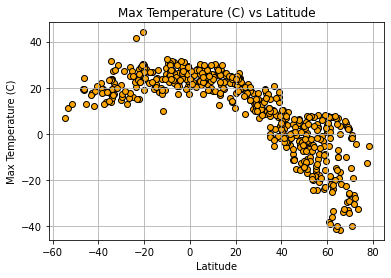

In [143]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],color="orange",edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature (C) vs Latitude")

# Max Temperature Analysis

From the above model we can see that as we approach Latitude = 0 we see higher temperatures generally (exceptions being the two values above 40C), this is expected as Lat = 0 is the location of the equator, which is generally the hottest climate


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Percentage Humidity vs Latitude')

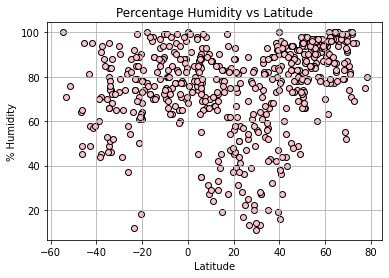

In [144]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(weather_df["Lat"],weather_df["Humidity"],color="pink",edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Percentage Humidity vs Latitude")

# Humidity Analysis

There's a lot of variance between +20 and +40 latitude, with % Humidity ranging from less than 20% up to just above 80%, there's a similar spread at -20 latitude, and most other areas of the plot is majority of datapoints placed between 60 - 100%

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Percentage Cloudiness vs Latitude')

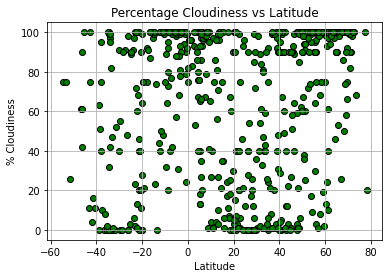

In [145]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color="green",edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Percentage Cloudiness vs Latitude")

# Cloudiness Analysis

The most interesting thing about this plot is that it has similarities with the Humidity plot from above. The same ranges of low humidity (~ -40 to -20 latitude and 20 to 40 latitude) reflect with little cloudiness.

This can be expected as humidity is due to closer H2O molecules, which is also how clouds are formed.

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed (mph) vs Latitude')

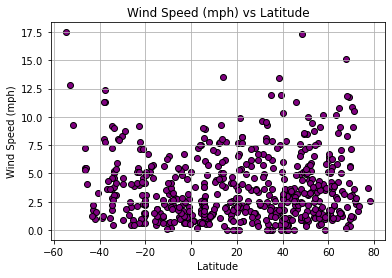

In [146]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],color="purple",edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude")

# Wind Speed Analysis

There doesn't seem to be much of a relationship between Latitude and Wind Speed, with wide variance across the range of Latitude. There is a very slight amount of higher wind speeds around the extremities of the data, but the majority of our cities seem to have had wind speeds below 7.5mph

## Linear Regression

In [147]:
#split original DataFrame into Northern and Southern Hemispheres, by esuring Lat is greater than or equal to, or less than 0
north_hemi_df = weather_df[weather_df["Lat"]>=0]

south_hemi_df = weather_df[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8476553089600999


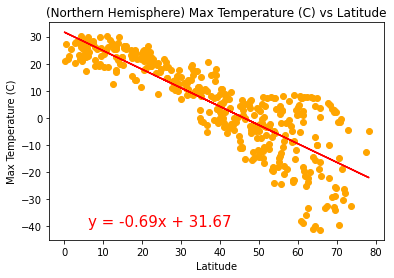

In [148]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(north_hemi_df["Lat"],north_hemi_df["Max Temp"],color="orange")
# Add the linear regression equation and line to plot
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("(Northern Hemisphere) Max Temperature (C) vs Latitude")

print(f"The r value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.49635389447973394


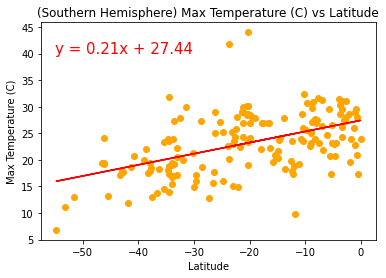

In [149]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(south_hemi_df["Lat"],south_hemi_df["Max Temp"],color="orange")
# Add the linear regression equation and line to plot
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("(Southern Hemisphere) Max Temperature (C) vs Latitude")

print(f"The r value is {rvalue}")

# Max Temperature Analysis

From our correlation coefficients, we can see that the Southern Hemisphere displays a weak positive relationship between Max Temp & Latitude, while the Northen Hemisphere displays a strong negative relationship.

This would suggest that we can expect higher Max Temperatures closer to Latitude = 0. This is expected as Lat = 0 is the equator.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.38035451051857666


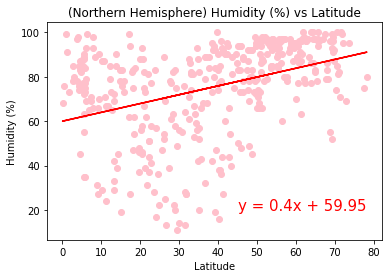

In [150]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(north_hemi_df["Lat"],north_hemi_df["Humidity"],color="pink")
# Add the linear regression equation and line to plot
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("(Northern Hemisphere) Humidity (%) vs Latitude")

print(f"The r value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.28583052411841836


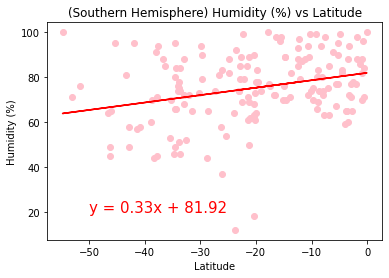

In [151]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(south_hemi_df["Lat"],south_hemi_df["Humidity"],color="pink")
# Add the linear regression equation and line to plot
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("(Southern Hemisphere) Humidity (%) vs Latitude")

print(f"The r value is {rvalue}")

# Humidity Analysis

Our Northern Hemisphere correlation coefficient shows a weak relationship between humidity and latitude, while our Southern Hemisphere suggests there is no relationship (as it falls between 0 and +0.3).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.2449110342035023


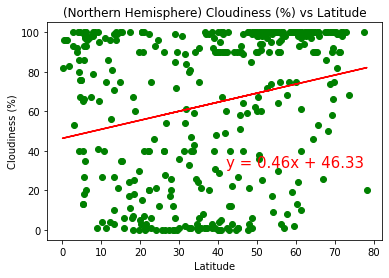

In [152]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(north_hemi_df["Lat"],north_hemi_df["Cloudiness"],color="green")
# Add the linear regression equation and line to plot
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("(Northern Hemisphere) Cloudiness (%) vs Latitude")

print(f"The r value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.41636241202198593


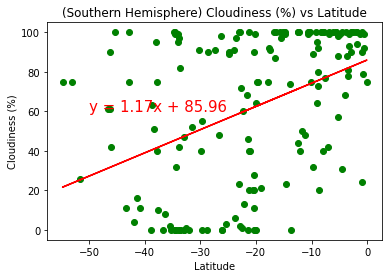

In [153]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(south_hemi_df["Lat"],south_hemi_df["Cloudiness"],color="green")
# Add the linear regression equation and line to plot
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("(Southern Hemisphere) Cloudiness (%) vs Latitude")

print(f"The r value is {rvalue}")

# Cloudiness Analysis

There is a slightly stronger positive relationship between Cloudiness and Latitude in the Southern Hemisphere than the Northern, defined as moderate and weak respectively

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.07992342198047449


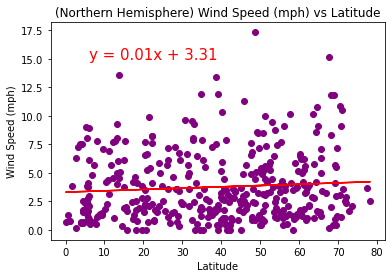

In [154]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(north_hemi_df["Lat"],north_hemi_df["Wind Speed"],color="purple")
# Add the linear regression equation and line to plot
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("(Northern Hemisphere) Wind Speed (mph) vs Latitude")

print(f"The r value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.42669759626926707


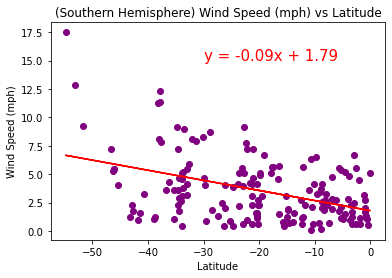

In [155]:
#create a scatterplot with matplotlib using plt.scatter

plt.scatter(south_hemi_df["Lat"],south_hemi_df["Wind Speed"],color="purple")
# Add the linear regression equation and line to plot
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("(Southern Hemisphere) Wind Speed (mph) vs Latitude")

print(f"The r value is {rvalue}")

# Wind Speed Analysis

From our Northern Hemisphere's correlation coefficient, there is a very weak (almost negligible) relationship between Wind Speed and Latitude. 

The Southern Hemisphere displays a weak relationship between the two axes.

These related weak relationships could lead to the conclusion that Latitude doesn't generally relate to Wind Speed.